In [1]:
#调库 析晶程序判别
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#初步读取和处理文本
file_path = r'C:\Users\zhang\Desktop\data.txt'
with open(file_path) as f:
    str_data = f.read()
data = str_data.split()

data_list = []
for i in range(len(data)//4):
    data_list.append([float(data[i*4+1]),float(data[i*4+2]),float(data[i*4+2])])

In [3]:
data_list[0:10]

[[47.0994, 6.80739, 6.80739],
 [10.567, 6.48451, 6.48451],
 [32.1932, 5.90659, 5.90659],
 [33.4149, 1.32075, 1.32075],
 [48.7941, 1.27417, 1.27417],
 [13.5043, 0.677486, 0.677486],
 [6.23811, 7.40147, 7.40147],
 [24.9079, 1.20266, 1.20266],
 [76.056, 6.38347, 6.38347],
 [105.26, 4.19725, 4.19725]]

In [4]:
#定义最大的附近原子数
max_neigh = 6

In [5]:
class point:
    def __init__(self,name,x,y,z):
        #自身坐标
        self.x=x
        self.y=y
        self.z=z
        self.name=name
        self.cry=0
        #记录最近的几个点 每个点按顺序记录下xyz 距离 
        self.neighbor_atom=[[1,1,1,555],[1,1,1,555],[1,1,1,555],[1,1,1,555],[1,1,1,555],[1,1,1,555]]
        #记录与最近的几个点的角度  三个点  六个角 
        self.angle=[]
    
    #定义类中的替换函数  如果这个距离比原有的小，就替换掉原有点的记录
    def sub(self,x,y,z,dis):
        #大多数点是比表中最大的点距离大的 所以大的直接返回
        if(dis>self.neighbor_atom[-1][3] or dis>):
            return
        
        #如果需要调整,那么先插入表尾，再排序，再删除最后一个节点就行
        else:
            self.neighbor_atom.append([x,y,z,dis])
            self.neighbor_atom.sort(key=lambda xx:xx[3])
            del self.neighbor_atom[-1]
    
    #计算以中心点为顶点，距离最近的任意两点为边的角的角度值
    def cal_angle(self):
        for i in range(max_neigh):
            for j in range(i+1,max_neigh):
                #此时便有了point nei[i] nei[j]三个点
                #定义两个空间向量
                x1,y1,z1 = (self.x-self.neighbor_atom[i][0]),(self.y-self.neighbor_atom[i][1]),(self.z-self.neighbor_atom[i][2])
                x2,y2,z2 = (self.x-self.neighbor_atom[j][0]),(self.y-self.neighbor_atom[j][1]),(self.z-self.neighbor_atom[j][2])
                #两个向量的夹角
                cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2)))
                B = math.degrees(math.cos(cos_b)) 
                self.angle.append(B)
                
    #最后还应该有一个判断是不是晶体的程序
    def judge_cry(self):
        pass

In [6]:
def cal_distance(x1,y1,z1,x2,y2,z2):
    dis = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(1/3)
    return dis

In [7]:
#记录class点的列表
list_point = []

In [8]:
#实例化点
for i in data_list:
    point_temp = point(i[0],i[1],i[2])
    list_point.append(point_temp)

In [9]:
#对所有的点进行排列组合 找到距离最近的六个点的位置放入表中
for i in range(len(list_point)):
    for j in range(i+1,len(list_point)):
        dis = cal_distance(list_point[i].x, list_point[i].y, list_point[i].z,list_point[j].x,list_point[j].y,list_point[j].z)
        #通过计算各个点的距离  如果距离小了就放入列表中
        list_point[i].sub(list_point[j].x, list_point[j].y, list_point[j].z, dis)
        list_point[j].sub(list_point[i].x, list_point[i].y, list_point[i].z, dis)

In [10]:
#再计算各自的角度
for i in list_point:
    i.cal_angle()

In [11]:
for i in list_point:
    print(i.x,i.y,i.z)
    for j in i.neighbor_atom:
        print(j)
    print(i.angle)
    print("\n")

47.0994 6.80739 6.80739
[47.0016, 6.75462, 6.75462, 0.24735442679101904]
[47.1524, 7.07541, 7.07541, 0.5271382973556931]
[1, 1, 1, 555]
[1, 1, 1, 555]
[1, 1, 1, 555]
[1, 1, 1, 555]
[43.41829554165307, 36.10443429899816, 36.10443429899816, 36.10443429899816, 36.10443429899816, 54.564022824263645, 54.564022824263645, 54.564022824263645, 54.564022824263645, 30.957041787430907, 30.957041787430907, 30.957041787430907, 30.957041787430907, 30.957041787430907, 30.957041787430907]


10.567 6.48451 6.48451
[10.6759, 6.32761, 6.32761, 0.39385274114106006]
[10.9766, 6.70202, 6.70202, 0.6402028655396731]
[9.86835, 6.47751, 6.47751, 0.7874122572939227]
[1, 1, 1, 555]
[1, 1, 1, 555]
[1, 1, 1, 555]
[56.29920907496863, 52.13186364075869, 55.87565582111849, 55.87565582111849, 55.87565582111849, 39.58629999383211, 30.99023920966084, 30.99023920966084, 30.99023920966084, 40.50482240460139, 40.50482240460139, 40.50482240460139, 30.957041787430903, 30.957041787430903, 30.957041787430903]


32.1932 5.90659 5

In [12]:
#现在有了各个点的数据和角度，那么怎么判断是不是晶体呢？
#可以画图来看看~ 分别画出总体的角度分布 以及晶体区域的角度分布


In [52]:
#画一下晶体区域的角度
list_cry= []
for i in list_point:
    if(i.x>50 and i.x<60):
        list_cry.append(i)

In [53]:
y=[]
x=[]
for i in list_cry:
    for j in i.angle:
        y.append(j)
        x.append(i.x)

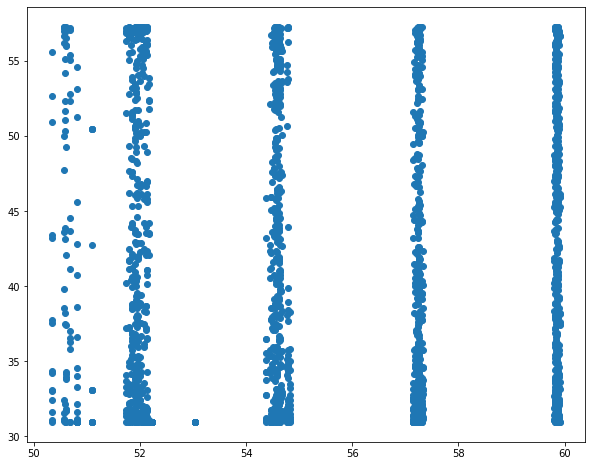

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)